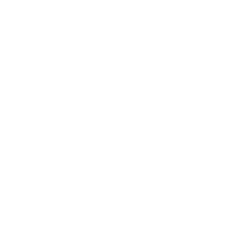

In [11]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import h5py
import glob
sys.path.insert(1, '/home/lars/predatorprey-1/predprey-16022022/')
from animateSwarm import AnimateTools as at
from TsTools import general as gen
from pathlib import Path
import pickle
from functools import partial


def pavas2colors(pavas):
    if np.std(pavas) > 1e-5:
        colors = np.squeeze(pavas)
        colors -= colors.min()
        colors /= colors.max()
    else:
        colors = 'k'
    return colors




#file_h5 = str(file)+".h5"
#file_dat = str(file)+".dat"



mode = 'gif' # 'normal', 'pictures', 'movie', 'gif'
fps = 15
dpi = 200
NsamShow = 4
sizePrey = 1/8
sizePred = sizePrey * 2
cmap = plt.get_cmap('coolwarm') # alternatives 'bwr', 'Reds'


file_h5 = "/home/lars/vmodel/output/state.nc"
name = "state"


with h5py.File(file_h5) as fh5:


    pos = np.moveaxis(np.array(fh5['/position']), [3,2], [1,3])[0,:,:,:]
    vel = np.moveaxis(np.array(fh5['/velocity']), [3,2], [1,3])[0,:,:,:]

posDat = at.datCollector( pos )
velDat = at.datCollector( vel )
positions = [posDat]


# comment line below for colors representing alignment strength
colors = 'k'
# get info from files
time, N, _ = posDat.dat.shape 



f, ax = plt.subplots(1)
ax.axis('off')
ax.set_aspect('equal')
# Collect update-tasks
#preds.colors = "r"
#preds_back_plot.colors = "b"
tasks = at.taskCollector()


tasks.append( at.Limits4Pos(positions, ax) )
tasks.append( at.headAndTail(posDat, ax))

#tasks.append( at.headAndTail(preds, ax))
#tasks.append( at.headAndTail(preds_back_plot, ax))
# animation
interval = 1000*(1/fps) # interval in ms
anim = animation.FuncAnimation(f, tasks.update, interval=interval,
                               frames=range(0-1, time), repeat=True)


plt.show()
anim.save(name + '.mp4', writer='ffmpeg', dpi=dpi, bitrate=-1, codec='libx264')